In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
datadir = '/content/drive/MyDrive/Knowledge Discovery/final-project/'

# Load the dataset

https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [ ]:
df = pd.read_csv(datadir + 'train.csv')

In [ ]:
df = df.set_index(df['id'])
df = df.drop('id', axis=1)

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


Check for missing values in the data

In [ ]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

The dataset has no missing values for any of the attributes. So, data imputation is required.

# Analyzing Data Correlation

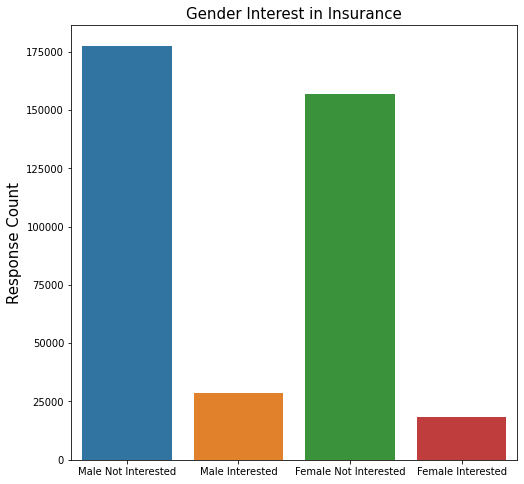

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x = ['Male Not Interested', 'Male Interested', 'Female Not Interested', 'Female Interested'],
            y = [len(df[(df['Gender'] == 'Male') & (df['Response'] == 0)]), 
                 len(df[(df['Gender'] == 'Male') & (df['Response'] == 1)]),
                 len(df[(df['Gender'] == 'Female') & (df['Response'] == 0)]),
                 len(df[(df['Gender'] == 'Female') & (df['Response'] == 1)])])
plt.ylabel('Response Count', size=15)
plt.title('Gender Interest in Insurance', size=15)
plt.show()

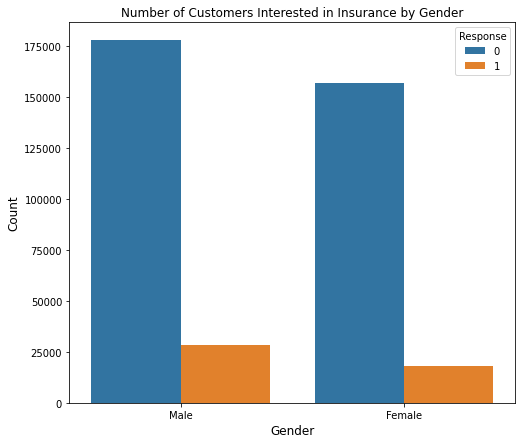

In [ ]:
plt.figure(figsize=(8, 7))
sns.countplot(x='Gender', data=df, hue='Response')
plt.xlabel('Gender', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of Customers Interested in Insurance by Gender', size=12)
plt.show()

We can see that members of both gender are interested in getting insurance again.

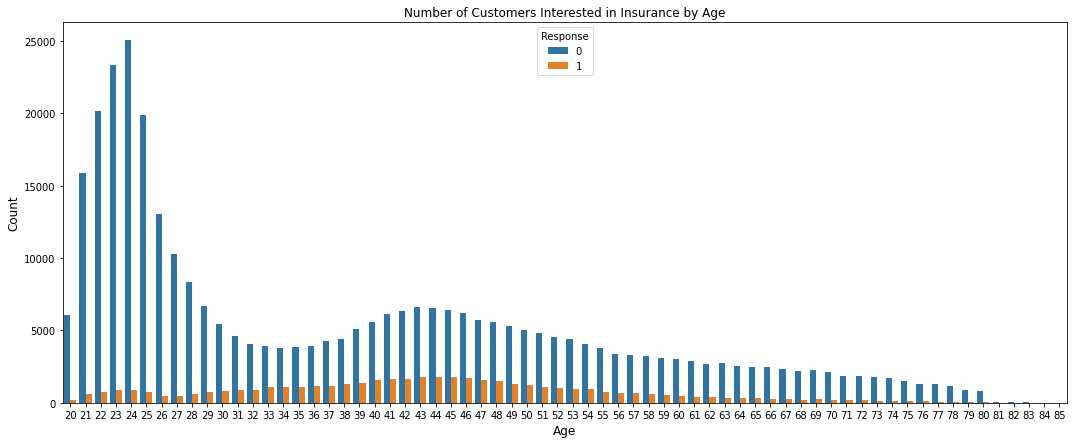

In [ ]:
plt.figure(figsize=(18, 7))
sns.countplot(x='Age', data=df, hue='Response')
plt.xlabel('Age', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of Customers Interested in Insurance by Age')
plt.show()

The graph shows that a very small portion of customers are interested in getting insurance by age. Age 24 has the most amount of customers who will not be getting their insurance again witht the company. Age 44 and 45 show the highest number of customers who are interested in renewing their insurance.

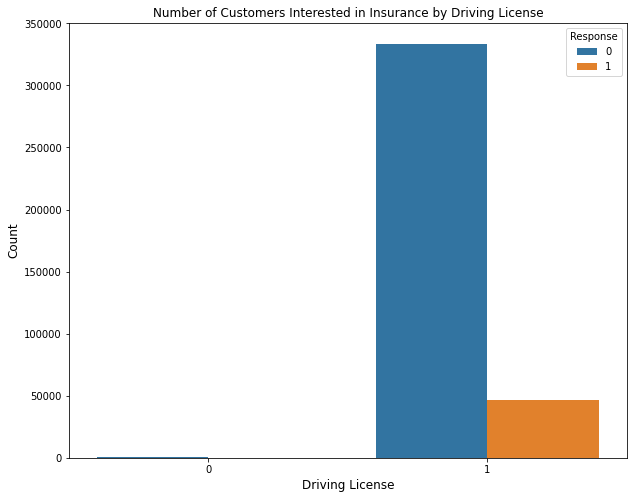

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Driving_License', data=df, hue='Response')
plt.xlabel('Driving License', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of Customers Interested in Insurance by Driving License')
plt.show()

Overall, it can be seen that customers who have driving license are interested in getting insurance. But majority of these customers with license are not interested in renewing their insurance.

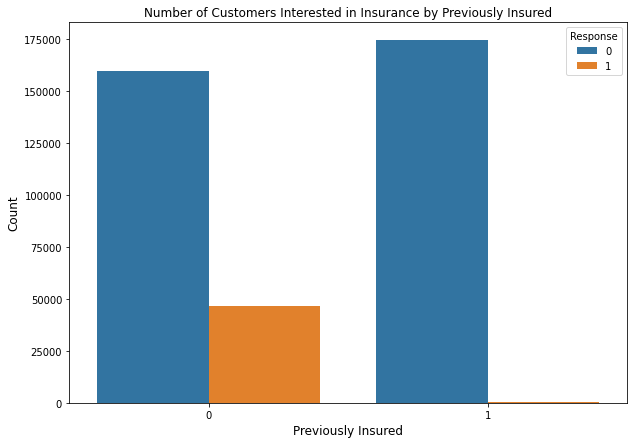

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Previously_Insured', data=df, hue='Response')
plt.xlabel('Previously Insured', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of Customers Interested in Insurance by Previously Insured')
plt.show()

Less than half of the customers who were previously insured are willing to renew their insurance. Very minimal amount of new customers are willing to get this vehicle insurance.

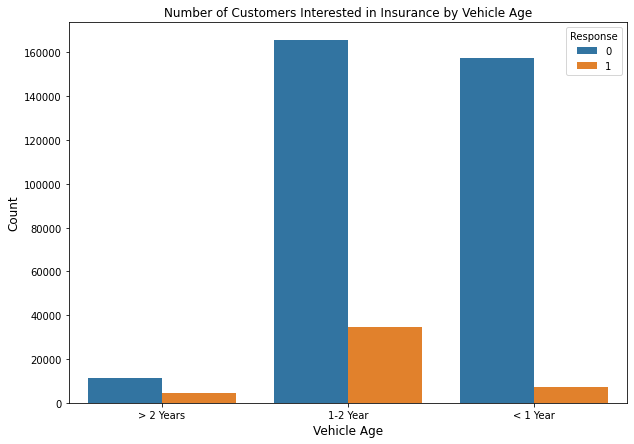

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Vehicle_Age', data=df, hue='Response')
plt.xlabel('Vehicle Age', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of Customers Interested in Insurance by Vehicle Age')
plt.show()

Customers who own a vehicle between 1-2 years old are most likely to renew their insurance. 

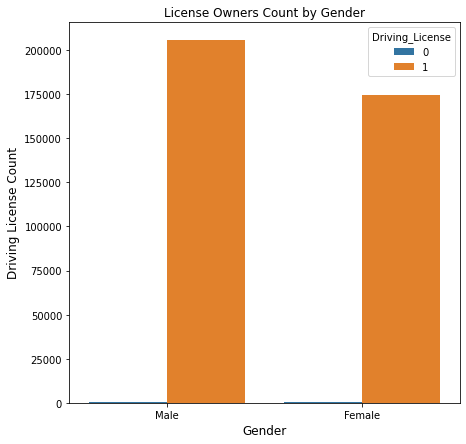

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Gender', data=df, hue='Driving_License')
plt.xlabel('Gender', size=12)
plt.ylabel('Driving License Count', size=12)
plt.title('License Owners Count by Gender', size=12)
plt.show()

Almost all the customer own a driving license.

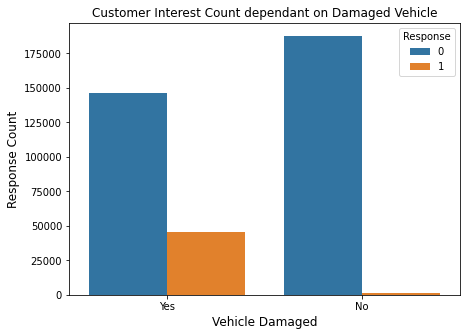

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Vehicle_Damage', data=df, hue='Response')
plt.xlabel('Vehicle Damaged', size=12)
plt.ylabel('Response Count', size=12)
plt.title('Customer Interest Count dependant on Damaged Vehicle', size=12)
plt.show()

The graph shows that customers with damaged vehicle are more likely to renew their insurance than customers who own a non damaged vehicle.

# Data Processing

In [ ]:
for col in df.columns:
  print(col, '% values count:')
  print(df[col].value_counts()/df.shape[0] * 100)
  print('------------------------------')

Gender % values count:
Male      54.07613
Female    45.92387
Name: Gender, dtype: float64
------------------------------
Age % values count:
24    6.811700
23    6.364583
22    5.500788
25    5.414724
21    4.318187
        ...   
81    0.014694
82    0.007609
83    0.005773
84    0.002886
85    0.002886
Name: Age, Length: 66, dtype: float64
------------------------------
Driving_License % values count:
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64
------------------------------
Region_Code % values count:
28.0    27.922458
8.0      8.889058
46.0     5.181982
41.0     4.792067
15.0     3.491914
30.0     3.198822
29.0     2.903369
50.0     2.687683
3.0      2.427390
11.0     2.422404
36.0     2.308264
33.0     2.008349
47.0     1.951148
35.0     1.821526
6.0      1.647823
45.0     1.470708
37.0     1.443419
18.0     1.352107
48.0     1.228258
14.0     1.227470
39.0     1.218549
10.0     1.147703
21.0     1.119365
2.0      1.059539
13.0     1.059015
7.0      0.86038

Since 99% of the values in Driving_License column are 1, then it means that majority of the customers own a driver's license. So, it does not contribute any meaningful information to Response prediction. So, lets remove it.

In [ ]:
df = df.drop('Driving_License', axis=1)

In [ ]:
df

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,
1,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,30.0,1,< 1 Year,No,35118.0,160.0,161,0


Looking at the dataset, there three attributes which are categorical: Gender, Vehicle_Age and Vehicle_Damage.

There are two nominal attributes: Region_Code and Policy_Sales_Channel.

In [ ]:
print('Gender: \t', df['Gender'].unique())
print('Vehicle Age: \t', df['Vehicle_Age'].unique())
print('Vehicle Damage: \t', df['Vehicle_Damage'].unique())
print('Region Code: \t', df['Region_Code'].unique())
print('Policy Sales Channel: \t', df['Policy_Sales_Channel'].unique())

Gender: 	 ['Male' 'Female']
Vehicle Age: 	 ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle Damage: 	 ['Yes' 'No']
Region Code: 	 [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
Policy Sales Channel: 	 [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  

Lets replace the Yes and No values for Vehicle_Damage.

1 -> True

0 -> False

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

Map Gender to binary values. 

1 -> Male

0 -> Female

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

Apply One Hot Encoding for Vehicle_Age.



In [ ]:
for val in df['Vehicle_Age'].unique():
  df['Vehicle_Age_' + str(val)] = df['Vehicle_Age'].apply(lambda x: 1 if x == val else 0)

df = df.drop('Vehicle_Age', axis=1)

Split the data into train and test datasets.

In [ ]:
df

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_> 2 Years,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year
id,,,,,,,,,,,,
1,1,44,28.0,0,1,40454.0,26.0,217,1,1,0,0
2,1,76,3.0,0,0,33536.0,26.0,183,0,0,1,0
3,1,47,28.0,0,1,38294.0,26.0,27,1,1,0,0
4,1,21,11.0,1,0,28619.0,152.0,203,0,0,0,1
5,0,29,41.0,1,0,27496.0,152.0,39,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,26.0,1,0,30170.0,26.0,88,0,0,1,0
381106,1,30,37.0,1,0,40016.0,152.0,131,0,0,0,1
381107,1,21,30.0,1,0,35118.0,160.0,161,0,0,0,1


In [ ]:
X = df.drop('Response', axis=1)
Y = df['Response']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
x_train = x_train.copy()
x_test = x_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

Standardize continuous attributes

In [ ]:
cont_vars = ['Age', 'Annual_Premium', 'Vintage']

for var in cont_vars:
  sc = StandardScaler()
  sc.fit(x_train[var].values.reshape(-1, 1))
  x_train[var] = sc.transform(x_train[var].values.reshape(-1, 1))
  x_test[var] = sc.transform(x_test[var].values.reshape(-1, 1))

In [ ]:
x_train

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_> 2 Years,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year
id,,,,,,,,,,,
246278,0,-0.958263,36.0,0,1,0.695175,152.0,-1.688028,0,0,1
203767,1,-1.151620,13.0,1,0,-0.321132,160.0,0.916593,0,0,1
163723,1,0.781946,8.0,0,1,-1.618103,7.0,1.609566,0,1,0
77458,0,0.137424,8.0,0,1,0.825144,7.0,-0.003388,0,1,0
85470,1,0.395233,28.0,0,1,1.917406,124.0,0.904645,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
259179,0,-0.958263,36.0,1,0,-0.463432,152.0,1.585670,0,0,1
365839,1,1.104208,35.0,0,1,0.619856,124.0,1.717096,0,1,0
131933,0,-1.087168,2.0,0,1,-0.678678,152.0,-0.935316,0,0,1


# Model Application

## Logistic Regression

In [ ]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_pred_list = []

for s in solver_list:
  lr = LogisticRegression(solver=s, max_iter=5000)
  lr.fit(x_train, y_train)
  lr_pred_list.append(lr.predict(x_test))

newton-cg :
Accuracy 87.62168402823332
Precision 0.0
Recall 0.0
F1 0.0
ROC AUC 49.99850274745841


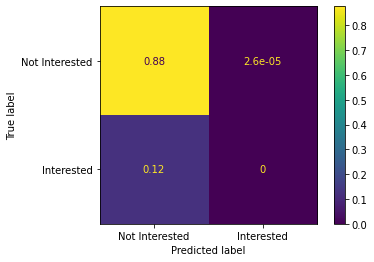

lbfgs :
Accuracy 87.62168402823332
Precision 16.666666666666664
Recall 0.005300540655146825
F1 0.010597710894446798
ROC AUC 50.00077870465059


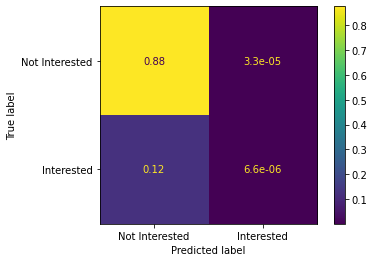

liblinear :
Accuracy 87.62168402823332
Precision 0.0
Recall 0.0
F1 0.0
ROC AUC 49.99850274745841


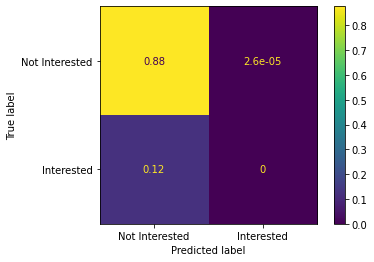

sag :
Accuracy 87.62168402823332
Precision 0.0
Recall 0.0
F1 0.0
ROC AUC 49.99850274745841


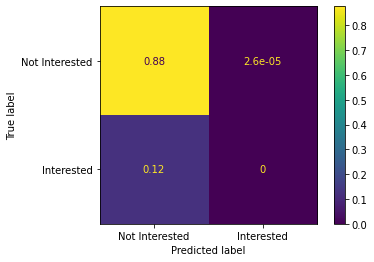

saga :
Accuracy 87.62168402823332
Precision 0.0
Recall 0.0
F1 0.0
ROC AUC 49.99850274745841


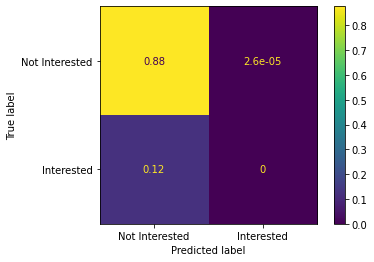

In [ ]:
for i in range(0, len(lr_pred_list)):
  print(solver_list[i], ':')
  print('Accuracy', accuracy_score(y_test, lr_pred_list[i])*100)
  print('Precision', precision_score(y_test, lr_pred_list[i])*100)
  print('Recall', recall_score(y_test, lr_pred_list[i])*100)
  print('F1', f1_score(y_test, lr_pred_list[i])*100)
  print('ROC AUC', roc_auc_score(y_test, lr_pred_list[i])*100)
  cm = confusion_matrix(y_test, lr_pred_list[i], normalize='all')
  ConfusionMatrixDisplay(cm, display_labels=['Not Interested', 'Interested']).plot()
  plt.show()

## Decision Tree

In [ ]:
criterion_list = ['gini', 'entropy']

dt_pred_list = []

for c in criterion_list:
  dt = DecisionTreeClassifier(criterion=c)
  dt.fit(x_train, y_train)
  dt_pred_list.append(dt.predict(x_test))

gini :
Accuracy 82.32072105166488
Precision 29.590548795880245
Recall 31.066468779815544
F1 30.310552581904687
ROC AUC 60.31306340366752


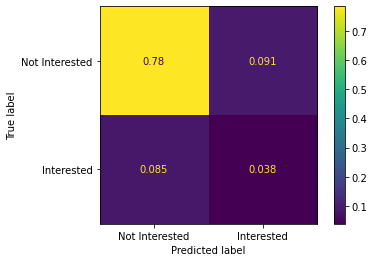

entropy :
Accuracy 82.40403033244995
Precision 29.474878778499946
Recall 30.287289303508956
F1 29.875562062114398
ROC AUC 60.02603546461288


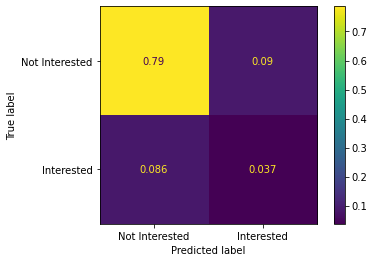

In [ ]:
for i in range(0, len(dt_pred_list)):
  print(criterion_list[i], ':')
  print('Accuracy', accuracy_score(y_test, dt_pred_list[i])*100)
  print('Precision', precision_score(y_test, dt_pred_list[i])*100)
  print('Recall', recall_score(y_test, dt_pred_list[i])*100)
  print('F1', f1_score(y_test, dt_pred_list[i])*100)
  print('ROC AUC', roc_auc_score(y_test, dt_pred_list[i])*100)
  cm = confusion_matrix(y_test, dt_pred_list[i], normalize='all')
  ConfusionMatrixDisplay(cm, display_labels=['Not Interested', 'Interested']).plot()
  plt.show()

## Random Forest

In [ ]:
rf_pred_list = []

for c in criterion_list:
  rf = RandomForestClassifier(criterion=c)
  rf.fit(x_train, y_train)
  rf_pred_list.append(rf.predict(x_test))

gini :
Accuracy 86.6573955026108
Precision 37.332416638019936
Recall 11.512774302978904
F1 17.59844433641225
ROC AUC 54.391641459833636


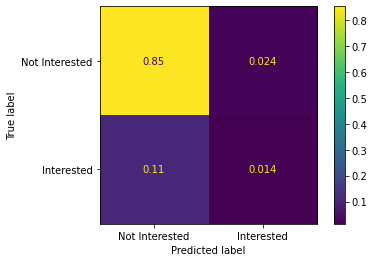

entropy :
Accuracy 86.64427593083362
Precision 36.99965193177863
Recall 11.26894943284215
F1 17.27612546725175
ROC AUC 54.27946116628557


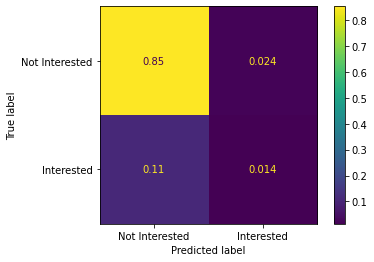

In [ ]:
for i in range(0, len(rf_pred_list)):
  print(criterion_list[i], ':')
  print('Accuracy', accuracy_score(y_test, rf_pred_list[i])*100)
  print('Precision', precision_score(y_test, rf_pred_list[i])*100)
  print('Recall', recall_score(y_test, rf_pred_list[i])*100)
  print('F1', f1_score(y_test, rf_pred_list[i])*100)
  print('ROC AUC', roc_auc_score(y_test, rf_pred_list[i])*100)
  cm = confusion_matrix(y_test, rf_pred_list[i], normalize='all')
  ConfusionMatrixDisplay(cm, display_labels=['Not Interested', 'Interested']).plot()
  plt.show()

## Deep Neural Network

In [ ]:
n_epoch = 10
batch_size = 256

# change the shape of the data for LSTM
train_X = x_train.to_numpy().reshape(-1, 1, x_train.shape[1])
train_Y = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_X = x_test.to_numpy().reshape(-1, 1, x_test.shape[1])
test_Y = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
def getModel(lstm_size, input_shape, loss_function):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(1, input_shape)))
  model.add(tf.keras.layers.LSTM(lstm_size))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(optimizer='adam', loss=loss_funcs, metrics=['accuracy'])
  return model

In [ ]:
loss_funcs = ['binary_crossentropy', 'hinge', 'squared_hinge']

dnn_pred_list = []
history = []

for lf in loss_funcs:
  nn_model = getModel(x_train.shape[1]*6, x_train.shape[1], lf)
  nn_model.fit(train_X, y_train, epochs=n_epoch, batch_size=batch_size)
  history.append(nn_model.history.history)

  y_pred = nn_model.predict(test_X)

  dnn_pred_list.append(y_pred)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 66)                20592     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 67        
Total params: 20,659
Trainable params: 20,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
894/894 [==============================] - 3s 4ms/step - loss: 0.3065 - accuracy: 0.8763
Epoch 2/10
894/894 [==============================] - 3s 4ms/step - loss: 0.2745 - accuracy: 0.8780
Epoch 3/10
894/894 [==============================] - 3s 4ms/step - loss: 0.2730 - accuracy: 0.8781
Epoch 4/10
894/894 [==============================] - 3s 4ms/step - loss: 0.2722 - accuracy: 0.8781
Epoch 5/10
894/894 [==============================] - 4s 4ms/step - loss: 0.2714 - accuracy: 0.8781
Epoch 6/10


LSTM Layer loss function binary_crossentropy :
Accuracy 87.62758783553305
Precision 56.75675675675676
Recall 0.11131135375808332
F1 0.2221869544516743
ROC AUC 50.0496666667127


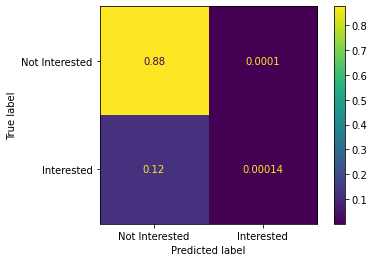

LSTM Layer loss function hinge :
Accuracy 87.62955577129962
Precision 56.25
Recall 0.1908194635852857
F1 0.3803486529318541
ROC AUC 50.08492896400154


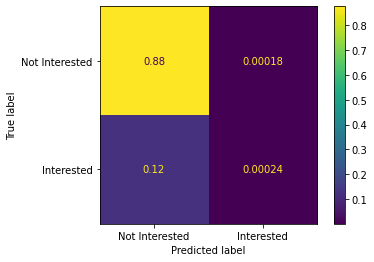

LSTM Layer loss function squared_hinge :
Accuracy 87.61906011387788
Precision 49.47643979057592
Recall 2.0036043676455
F1 3.8512480896586863
ROC AUC 50.85731731355969


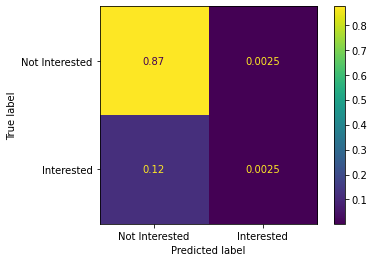

In [ ]:
for i in range(0, len(dnn_pred_list)):
  print('LSTM Layer loss function', loss_funcs[i], ':')
  
  temp_pred = [1 if x >= 0.5 else 0 for x in dnn_pred_list[i]]

  print('Accuracy', accuracy_score(y_test, temp_pred)*100)
  print('Precision', precision_score(y_test, temp_pred)*100)
  print('Recall', recall_score(y_test, temp_pred)*100)
  print('F1', f1_score(y_test, temp_pred)*100)
  print('ROC AUC', roc_auc_score(y_test, temp_pred)*100)
  cm = confusion_matrix(y_test, temp_pred, normalize='all')
  ConfusionMatrixDisplay(cm, display_labels=['Not Interested', 'Interested']).plot()
  plt.show()